In [34]:
import sklearn
import pandas
import seaborn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [38]:
ds=pandas.read_csv('StudentsPerformance.csv')

In [39]:
ds.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [40]:
ds.shape

(1000, 8)

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [41]:
ds.groupby('test_preparation_course').size()

test_preparation_course
completed    358
none         642
dtype: int64

In [13]:
clean_ds=ds.drop(columns=['id', 'date', 'dl_applied', 'venue', 'player_of_match', 'umpire1', 'umpire2', 'umpire3' ], axis='1')
clean_ds.head(10)

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0
5,2017,Hyderabad,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,9
6,2017,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4
7,2017,Indore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,Kings XI Punjab,0,8
8,2017,Pune,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Delhi Daredevils,97,0
9,2017,Mumbai,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4


In [14]:
clean_ds.describe()

,season,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,2013.444444,13.283069,3.350529
std,3.366895,23.471144,3.387963
min,2008.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000
50%,2013.000000,0.000000,4.000000
75%,2016.000000,19.000000,6.000000
max,2019.000000,146.000000,10.000000


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

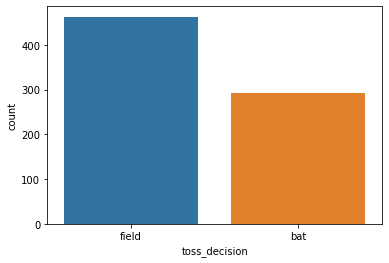

In [15]:
seaborn.countplot(x='toss_decision', data=clean_ds)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

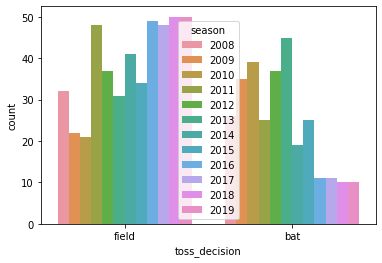

In [16]:
seaborn.countplot(x='toss_decision', hue='season', data=clean_ds)

<AxesSubplot:>

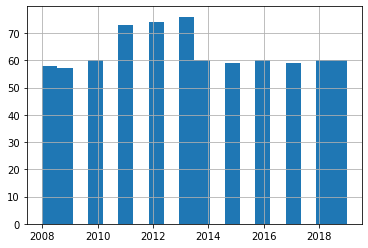

In [17]:
clean_ds['season'].hist(bins=20)

In [18]:
bin_toss = pandas.get_dummies (clean_ds ['toss_decision'])
bin_toss.head()

,bat,field
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [19]:
home_win=[]
for i in range (0, len  (ds ['team1'])):
    if clean_ds ['team1'][i] == clean_ds ['winner'][i]:
        home_win.append (1);
    else:
        home_win.append (0);
home_win_df=pandas.DataFrame (data = home_win, columns = ['home_win'])
aug_ds = pandas.concat([clean_ds, home_win_df], axis = 1)
aug_ds.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,home_win
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,1
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,0
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,0
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,0
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,1


In [20]:
toss_match_win=[]
for i in range (0, len  (ds ['toss_winner'])):
    if clean_ds ['toss_winner'][i] == clean_ds ['winner'][i]:
        toss_match_win.append (1);
    else:
        toss_match_win.append (0);
toss_match_win_df=pandas.DataFrame (data = toss_match_win, columns = ['toss_match_win'])
aug_ds = pandas.concat([aug_ds, toss_match_win_df], axis = 1)
aug_ds.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,home_win,toss_match_win
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,1,0
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,0,1
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,0,1
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,0,1
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,1,1


In [21]:
first_bat_win=[]
for i in range (0, len  (ds ['win_by_runs'])):
    if clean_ds ['win_by_runs'][i] >0:
        first_bat_win.append (1);
    else:
        first_bat_win.append (0);
first_bat_win_df=pandas.DataFrame (data = first_bat_win, columns = ['first_bat_win'])
aug_ds = pandas.concat([aug_ds, first_bat_win_df], axis = 1)
aug_ds.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,home_win,toss_match_win,first_bat_win
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,1,0,1
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,0,1,0
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,0,1,0
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,0,1,0
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,1,1,1


In [22]:
aug_ds=aug_ds.drop(columns=['win_by_runs', 'win_by_wickets'], axis = '1')
aug_ds.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,home_win,toss_match_win,first_bat_win
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,1,0,1
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,1,0
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,1,0
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,1,0
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,1,1,1


In [23]:
bin_res = pandas.get_dummies (aug_ds ['result'],drop_first = True)
bin_res.head ()

,normal,tie
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [24]:
fin_ds = pandas.concat ([aug_ds, bin_res, bin_toss], axis = 1)
fin_ds1 = fin_ds.drop (columns = ['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result'], axis = 1)
fin_ds1.head()

,home_win,toss_match_win,first_bat_win,normal,tie,bat,field
0,1,0,1,1,0,0,1
1,0,1,0,1,0,0,1
2,0,1,0,1,0,0,1
3,0,1,0,1,0,0,1
4,1,1,1,1,0,1,0


In [25]:
Y = fin_ds1 ['home_win']
X = fin_ds1.drop (columns = ['home_win'], axis = 1)
X.head()

,toss_match_win,first_bat_win,normal,tie,bat,field
0,0,1,1,0,0,1
1,1,0,1,0,0,1
2,1,0,1,0,0,1
3,1,0,1,0,0,1
4,1,1,1,0,1,0


In [26]:
Y.head()

0    1
1    0
2    0
3    0
4    1
Name: home_win, dtype: int64

In [27]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = 0.2, random_state = 0)
model = LogisticRegression (solver = 'liblinear')
model.fit (X_train, Y_train)

LogisticRegression(solver='liblinear')

In [28]:
print(X_train)

     toss_match_win  first_bat_win  normal  tie  bat  field
354               1              0       1    0    0      1
252               1              1       1    0    1      0
97                0              1       1    0    0      1
522               1              0       1    0    0      1
466               0              1       1    0    0      1
..              ...            ...     ...  ...  ...    ...
707               0              1       1    0    0      1
192               0              1       1    0    0      1
629               1              0       1    0    0      1
559               0              0       1    0    1      0
684               1              0       1    0    0      1

[604 rows x 6 columns]


In [32]:
print(X_test)

     toss_match_win  first_bat_win  normal  tie  bat  field
650               1              0       1    0    0      1
734               0              1       1    0    0      1
404               0              0       1    0    1      0
79                0              0       1    0    1      0
422               0              0       1    0    1      0
..              ...            ...     ...  ...  ...    ...
156               0              0       1    0    1      0
118               1              1       1    0    1      0
649               0              1       1    0    0      1
476               0              1       1    0    0      1
181               1              1       1    0    1      0

[152 rows x 6 columns]


In [29]:
predictions = model.predict (X_test)
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.99      1.00      0.99        69

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152



In [30]:
print (confusion_matrix (Y_test, predictions))

[[82  1]
 [ 0 69]]


In [31]:
accuracy_score (Y_test, predictions)

0.993421052631579